# Minimax and Alpha-beta pruning

**Exercise 1:**  Tic-Tac-Toe is a paper-and-pencil game for two players, `X` and `O`, who take turns marking the spaces in a $3\times 3$ grid. The player who succeeds in placing three of their marks in a diagonal, horizontal, or vertical row is the winner.

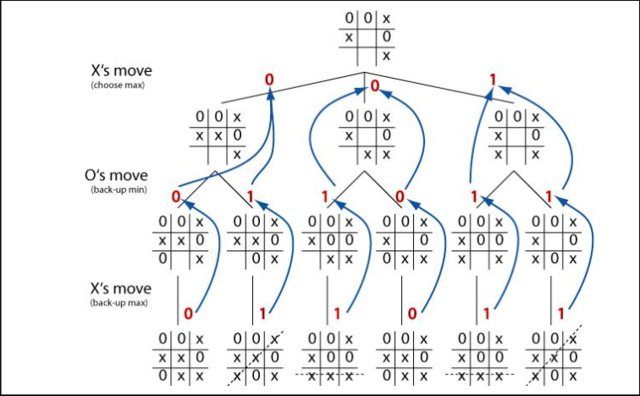

**Exercise 1.a** Write a `Minimax` implementation of the Tic-Tac-Toe game.

In [1]:
import copy

class Game:
    def __init__(self):
        self.initialize_game()
        
    # Initialization of the game
    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        
        # First player is on the move
        self.player_turn = 'X'
        
    def draw_board(self):
        
        for i in range(0, 3):
            for j in range(0, 3):
                # we put the 'end' to prevent writing a new line
                print('{}|'.format(self.current_state[i][j]), end =" ")
            print()        
        print()
        
    def valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True
     
    # Checking if the game came to an end
    def end(self):
        # equal vertically
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and 
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                # return the winner
                return self.current_state[0][i]
            
        # equal horizontally
        for i in range(0, 3):
            # there exist a horizontal line with X as a winner 
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            # or there exists a horizontal line with O as a winner
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'
            
        # equal over the main diagonal
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            # return the winner
            return self.current_state[0][0]
        
        # equal over the antidiagonal
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
             # return the winner
            return self.current_state[0][2]       
        
        # the entire table is full (or there are still empty cells)
        for i in range(0, 3):
            for j in range(0, 3):
                 # There is an empty field, the game continues, there is no winneer yet
                if (self.current_state[i][j] == '.'):
                    return None
               
        # They are in a tie
        return '.'
    
    # The Max player is 'O'
    def Max(self):
       
        # possible values are -1 (lost), 0 (in a tie) and 1 (won). The worst possibility for max is -1
        # (here we set it to even worse, i.e., -2)
        maxv = -2
        px = None
        py = None
        
        result = self.end()
        
        # if the end is required, the function needs to return the end evaluation, 
        # that can be -1 (lost), 0 (in a tie) and 1 (won)
        if result == 'X':
            return (-1, _, _)
        elif result == 'O':
            return (1, _, _)
        elif result == '.':
            return (0, _, _)
        
        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    # on an empty cell, the 'O' player makes a move and call min, 
                    # that is one branch of the tree
                    self.current_state[i][j] = 'O'
                    m = self.Min()
                    # the max value is being fixed if needed
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    # We change the cell again to empty
                    self.current_state[i][j] = '.'
                    
        return (maxv, px, py)
    
    
    def Min(self):

        # possible values are -1 (lost), 0 (in a tie) and 1 (won). The worst possibility for min is 1
        # (here we set it to even worse, i.e., 2)
        minv = 2
        
        result = self.end()  
        
        # if the end is required, the function needs to return the end evaluation, 
        # that can be -1 (lost), 0 (in a tie) and 1 (won)
        if result == 'X':
            return -1
        elif result == 'O':
            return 1
        elif result == '.':
            return 0
        
        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    # on an empty cell, the 'X' player makes a move and call max, that is one branch of the tree
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.Max()
                    # the min value is being fixed if needed
                    if m < minv:
                        minv = m
                    # We change the cell again to empty
                    self.current_state[i][j] = '.'
                    
        return minv
    
        
    def play(self):
        
        while True:
            self.draw_board()

            self.result = self.end()

            # if twe are done, print the appropriate message
            if self.result != None:
                if self.result == 'X':
                    print('The player X won')
                elif self.result == 'O':
                    print('The player O won')
                elif self.result == '.':
                    print('It is a draw.')
                return 
            
            # if the player X is on the move, i.e., the human
            if self.player_turn == 'X':

                while True:
                    px = int(input('Enter x coordinate: '))
                    py = int(input('Enter y coordinate: '))

                    if self.valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break;
                    else:
                        print('The move is not valid')
             
            # if the player O is on the move, i.e., the machine
            else:
                (m, px, py) = self.Max()
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'

In [2]:
g = Game()
g.play()

.| .| .| 
.| .| .| 
.| .| .| 

Enter x coordinate: 0
Enter y coordinate: 1
.| X| .| 
.| .| .| 
.| .| .| 

O| X| .| 
.| .| .| 
.| .| .| 

Enter x coordinate: 0
Enter y coordinate: 2
O| X| X| 
.| .| .| 
.| .| .| 

O| X| X| 
O| .| .| 
.| .| .| 

Enter x coordinate: 2
Enter y coordinate: 0
O| X| X| 
O| .| .| 
X| .| .| 

O| X| X| 
O| O| .| 
X| .| .| 

Enter x coordinate: 2
Enter y coordinate: 2
O| X| X| 
O| O| .| 
X| .| X| 

O| X| X| 
O| O| O| 
X| .| X| 

The player O won


**Exercise 1.b** Write the `Alpha-beta pruning` implementation of the Tic-Tac-Toe game. 

Note that you can just make necessary changes in the code above.

In [3]:
import copy

class Game:
    def __init__(self):
        self.initialize_game()
        
    # Initialization of the game
    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        
        # First player is on the move
        self.player_turn = 'X'
        
    def draw_board(self):
        
        for i in range(0, 3):
            for j in range(0, 3):
                # we put the 'end' to prevent writing a new line
                print('{}|'.format(self.current_state[i][j]), end =" ")
            print()        
        print()
        
    def valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True
     
    # Checking if the game came to an end
    def end(self):
        # equal vertically
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and 
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                # return the winner
                return self.current_state[0][i]
            
        # equal horizontally
        for i in range(0, 3):
            # there exist a horizontal line with X as a winner 
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            # or there exists a horizontal line with O as a winner
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'
            
        # equal over the main diagonal
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            # return the winner
            return self.current_state[0][0]
        
        # equal over the antidiagonal
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
             # return the winner
            return self.current_state[0][2]       
        
        # the entire table is full (or there are still empty cells)
        for i in range(0, 3):
            for j in range(0, 3):
                 # There is an empty field, the game continues, there is no winneer yet
                if (self.current_state[i][j] == '.'):
                    return None
               
        # They are in a tie
        return '.'
    
    def Max_alfa_beta(self, alfa, beta):
        
        maxv = -2
        px = None
        py = None
        
        result = self.end()
        
        if result == 'X':
            return (-1, _, _)
        elif result == 'O':
            return (1, _, _)
        elif result == '.':
            return (0, _, _)
        
        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'O'
                    m = self.Min_alfa_beta(alfa, beta)
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    self.current_state[i][j] = '.'
                    
                    # The next two rows are the only changes relative compared to the minimax.
                    if maxv >= beta:
                        return (maxv, _, _)
                    
                    if maxv > alfa:
                        alfa = maxv
                    
        return (maxv, px, py)
    
    def Min_alfa_beta(self, alfa, beta):
                
        minv = 2
        
        result = self.end()  
        
        # if twe are done, print the appropriate message
        if self.result != None:
            if self.result == 'X':
                print('The player X won')
            elif self.result == 'O':
                print('The player O won')
            elif self.result == '.':
                print('It is a draw.')
            return 
        
        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.Max_alfa_beta(alfa, beta)
                    if m < minv:
                        minv = m
                    self.current_state[i][j] = '.'
                    
                    # The next two rows are the only changes relative compared to the minimax.
                    if minv <= alfa:
                        return minv
                    
                    if minv < beta:
                        beta = minv
                    
        return minv
                
    
    def play_alfa_beta(self):
        
        while True:
            self.draw_board()

            self.result = self.end()

            # if twe are done, print the appropriate message
            if self.result != None:
                if self.result == 'X':
                    print('The player X won')
                elif self.result == 'O':
                    print('The player O won')
                elif self.result == '.':
                    print('It is a draw.')
                return 
        

            if self.player_turn == 'X':

                while True:
                    px = int(input('Enter the x coordinate: '))
                    py = int(input('Enter the y coordinate: '))

                    if self.valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break;
                    else:
                        print('The move is not valid')
                        
            else:
                (m, px, py) = self.Max_alfa_beta(-2, 2)
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'
                    

In [4]:
g = Game()
g.play_alfa_beta()

.| .| .| 
.| .| .| 
.| .| .| 

Enter the x coordinate: 0
Enter the y coordinate: 1
.| X| .| 
.| .| .| 
.| .| .| 

O| X| .| 
.| .| .| 
.| .| .| 

Enter the x coordinate: 0
Enter the y coordinate: 2
O| X| X| 
.| .| .| 
.| .| .| 

O| X| X| 
O| .| .| 
.| .| .| 

Enter the x coordinate: 1
Enter the y coordinate: 1
O| X| X| 
O| X| .| 
.| .| .| 

O| X| X| 
O| X| .| 
O| .| .| 

The player O won
